In [1]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_raw = pd.read_excel("./data_hir.xlsx")
df_raw = df_raw.drop(0)

In [3]:
def plot_experience(Prefixe_of_experience, column, df_raw):
    df_programming_lang = df_raw[[column]]
    df_programming_lang.loc[:, column] = df_programming_lang[column].dropna().astype({column: int})
    tmp = dict(df_programming_lang.value_counts().sort_index())
    data = {}

    if (1.0,) in tmp.keys():
        data["no experience"] = tmp[(1.0,)]
    else:
        data["no experience"] = 0

    if (2.0,) in tmp:
        data["little experience"] = tmp[(2.0,)]
    else:
        data["little experience"] = 0

    if (3.0,) in tmp:
        data["average"] = tmp[(3.0,)]
    else:
        data["average"] = 0

    if (4.0,) in tmp:
        data["experienced"] = tmp[(4.0,)]
    else:
        data["experienced"] = 0

    if (5.0,) in tmp:
        data["proficient"] = tmp[(5.0,)]
    else:
        data["proficient"] = 0

    names, counts = zip(*data.items())
    plt.bar(names, counts)
    plt.title(Prefixe_of_experience + " Experience")
    plt.xticks(rotation=350)
    plt.xlabel("")
    plt.tight_layout()
    plt.show()


def plot_self_assessment(Prefixe_of_experience, column, df_raw):
    df_programming_lang = df_raw[[column]]
    df_programming_lang.loc[:, column] = df_programming_lang[column].dropna().astype({column: int})
    tmp = dict(df_programming_lang.value_counts().sort_index())
    data = {}

    if (1.0,) in tmp.keys():
        data["significantly worse"] = tmp[(1.0,)]
    else:
        data["significantly worse"] = 0

    if (2.0,) in tmp:
        data["worse"] = tmp[(2.0,)]
    else:
        data["worse"] = 0

    if (3.0,) in tmp:
        data["same"] = tmp[(3.0,)]
    else:
        data["same"] = 0

    if (4.0,) in tmp:
        data["better"] = tmp[(4.0,)]
    else:
        data["better"] = 0

    if (5.0,) in tmp:
        data["significantly better"] = tmp[(5.0,)]
    else:
        data["significantly better"] = 0

    names, counts = zip(*data.items())
    plt.bar(names, counts)
    plt.title("Programming Experience Compared to " + Prefixe_of_experience)
    plt.xticks(rotation=350)
    plt.xlabel("")
    plt.tight_layout()
    plt.show()

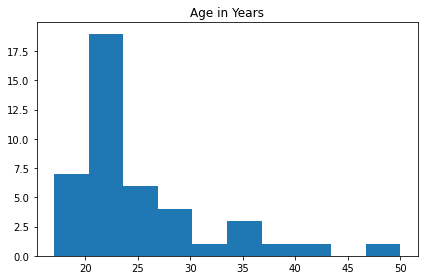

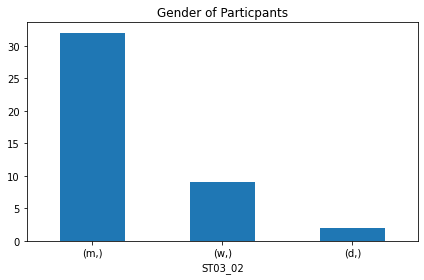

In [4]:
df_age = df_raw[["ST03_01"]].dropna().astype({"ST03_01": int})
df_age.hist()
plt.title("Age in Years")
plt.grid(b=None)
plt.tight_layout()
plt.show()

df_sex = df_raw[["ST03_02"]].dropna()
df_sex["ST03_02"] = df_sex["ST03_02"].apply(lambda sex: "w" if sex == "f" or sex == "F" or sex == "W" else sex)
df_sex["ST03_02"] = df_sex["ST03_02"].apply(lambda sex: "m" if sex == "M" else sex)
df_sex.value_counts().plot(kind="bar")
plt.title("Gender of Particpants")
plt.xticks(rotation="horizontal")
plt.tight_layout()
plt.show()

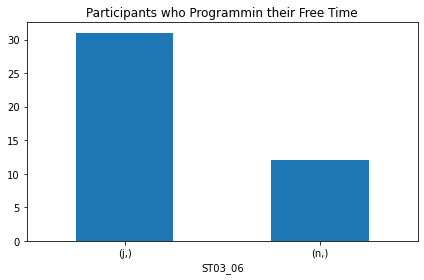

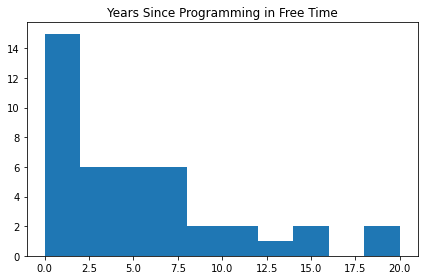

In [6]:
df_free_time_programming = df_raw[["ST03_06"]].dropna()
df_free_time_programming["ST03_06"] = df_free_time_programming["ST03_06"].apply(lambda flag: "n" if flag == "N" else flag)
df_free_time_programming["ST03_06"] = df_free_time_programming["ST03_06"].apply(lambda flag: "j" if flag == "J" or flag == "y" or flag == "Y" else flag)
df_free_time_programming.value_counts().plot(kind="bar")
plt.title("Participants who Programmin their Free Time")
plt.xticks(rotation="horizontal")
plt.tight_layout()
plt.show()

df_years_free_porgramming = df_raw[["ST03_03"]]
df_years_free_porgramming.loc[:, "ST03_03"] = df_years_free_porgramming["ST03_03"].apply(lambda years: list(re.findall(r"\d+", years))[0] if len(re.findall(r"\d+", str(years))) > 0 else float("NaN"))
df_years_free_porgramming.loc[:, "ST03_03"] = df_years_free_porgramming["ST03_03"].dropna().astype({"ST03_03": int})
df_years_free_porgramming.hist()
plt.title("Years Since Programming in Free Time")
plt.grid(b=None)
plt.tight_layout()
plt.show()

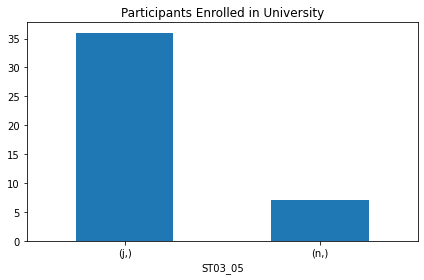

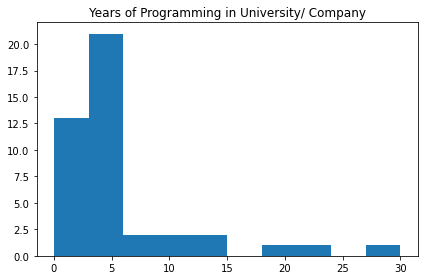

In [7]:
df_university = df_raw[["ST03_05"]].dropna()
df_university["ST03_05"] = df_university["ST03_05"].apply(lambda flag: "n" if flag == "N" else flag)
df_university["ST03_05"] = df_university["ST03_05"].apply(lambda flag: "j" if flag == "J" or flag == "y" or flag == "Y" else flag)
df_university.value_counts().plot(kind="bar")
plt.title("Participants Enrolled in University")
plt.xticks(rotation="horizontal")
plt.tight_layout()
plt.show()

df_years_porgramming = df_raw[["ST03_04"]]
df_years_porgramming.loc[:, "ST03_04"] = df_years_porgramming["ST03_04"].apply(lambda years: list(re.findall(r"\d+", years))[0] if len(re.findall(r"\d+", str(years))) > 0 else float("NaN"))
df_years_porgramming.loc[:, "ST03_04"] = df_years_porgramming[["ST03_04"]].dropna().astype({"ST03_04": int})
df_years_porgramming.hist()
plt.title("Years of Programming in University/ Company")
plt.xticks(rotation="horizontal")
plt.grid(b=None)
plt.tight_layout()
plt.show()

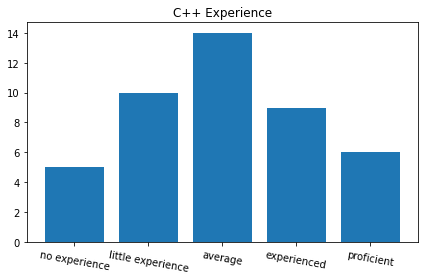

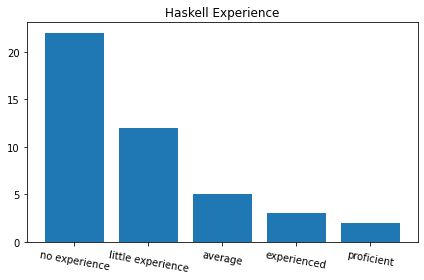

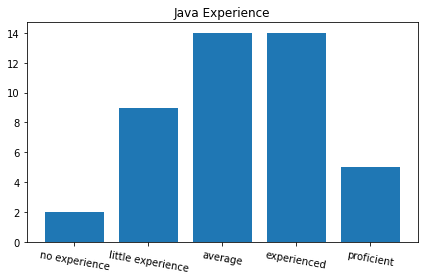

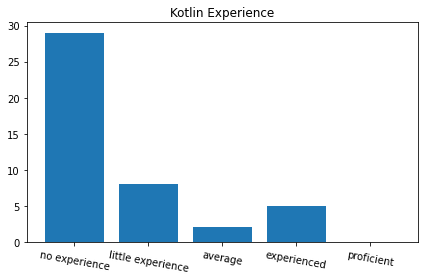

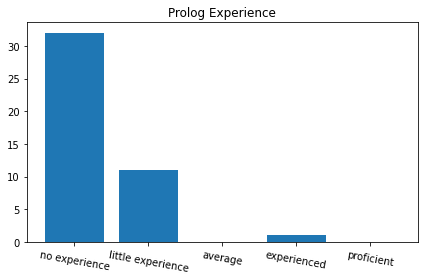

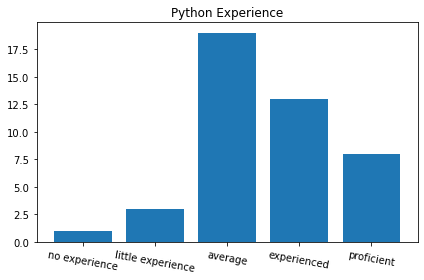

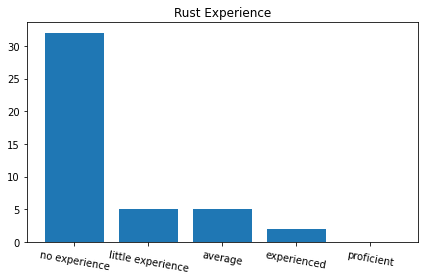

In [8]:
plot_experience("C++", "ST04_01", df_raw)
plot_experience("Haskell", "ST04_03", df_raw)
plot_experience("Java", "ST04_02", df_raw)
plot_experience("Kotlin", "ST04_07", df_raw)
plot_experience("Prolog", "ST04_05", df_raw)
plot_experience("Python", "ST04_04", df_raw)
plot_experience("Rust", "ST04_06", df_raw)

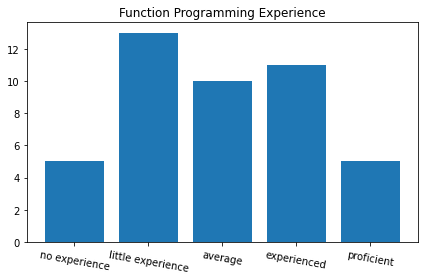

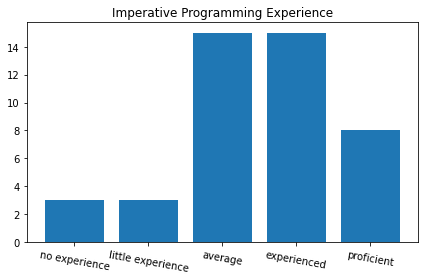

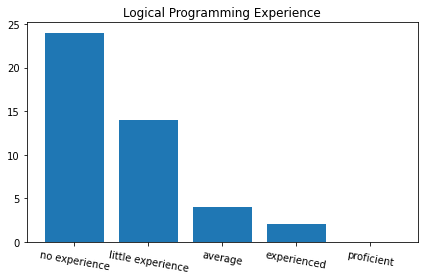

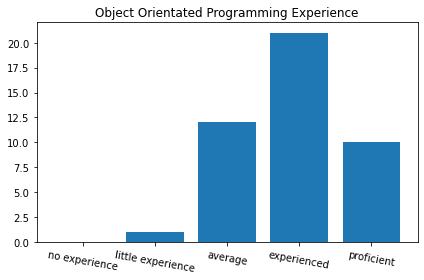

In [9]:
plot_experience("Function Programming", "ST05_03", df_raw)
plot_experience("Imperative Programming", "ST05_02", df_raw)
plot_experience("Logical Programming", "ST05_01", df_raw)
plot_experience("Object Orientated Programming", "ST05_04", df_raw)

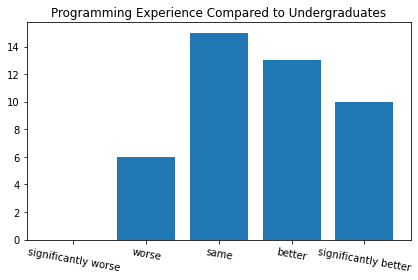

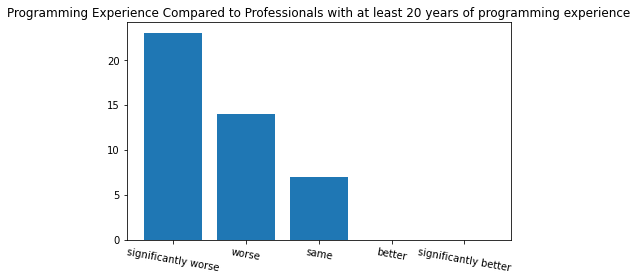

In [10]:
plot_self_assessment("Undergraduates", "ST06_02", df_raw)
plot_self_assessment("Professionals with at least 20 years of programming experience", "ST06_03", df_raw)

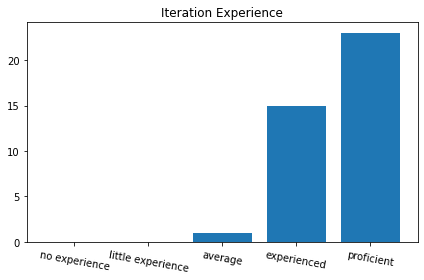

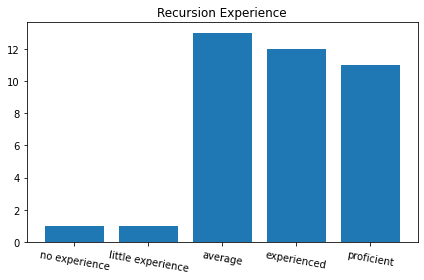

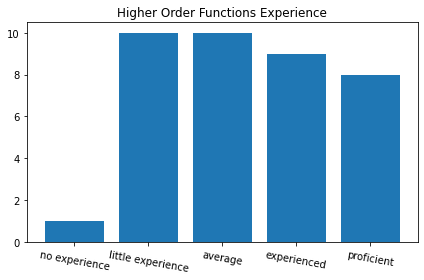

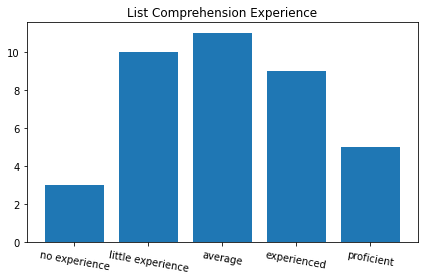

In [11]:
plot_experience("Iteration", "ST12", df_raw)
plot_experience("Recursion", "ST13", df_raw)
plot_experience("Higher Order Functions", "ST14", df_raw)
plot_experience("List Comprehension", "ST15", df_raw)

In [12]:
config_prefix = ["IT", "RE", "HO", "LC"]
config_prefix_variable = ["IV", "RV", "HV", "LV"]

config_id_variable = "CASE"

config_algo_names = ["apply", "condition", "find", "is_prime", "max", "node", "prime_factors", "quad_mul", "students", "computer", "store", "LinkedList"]

config_answer_variables = [[[prefix + str(x).zfill(2) + "_01", prefix + str(x).zfill(2) + "_01a"] for x in range(15, 27)] for prefix in config_prefix]

config_click_variables = [[prefix + str(x).zfill(2) + "_01" for x in range(2, 14)] for prefix in config_prefix_variable]

config_time_variables = [[prefix + str(x).zfill(2) + "_02" for x in range(2, 14)] for prefix in config_prefix_variable]


config_answer_patterns = [
    '^"?\[2,6,12\]"?$',
    '^"?42"?$',
    '^"?2"?$',
    '^"?(True|true)"?$',
    '^"?5"?$',
    '^"?36"?$',
    '^"?[2,3]"?$',
    '^"?36"?$',
    '^"?(["Jasmin","Florian"]|[Jasmin,Florian])"?$',
    '^"?[1,5]"?$',
    '^"?[1,3]"?$',
    '^"?16"?$',
]

In [14]:
df_matrix = []

# load data
for algo_idx, _stuff in enumerate(config_algo_names):
    df_array = []
    for detail_idx, _stuff in enumerate(config_prefix_variable):
        df = pd.DataFrame(
            df_raw,
            columns=[
                config_id_variable,
                config_answer_variables[detail_idx][algo_idx][0],
                config_answer_variables[detail_idx][algo_idx][1],
                config_click_variables[detail_idx][algo_idx],
                config_time_variables[detail_idx][algo_idx],
            ],
        )
        df = df.dropna(subset=config_answer_variables[detail_idx][algo_idx], how="all")
        df_array.append(df)
    df_matrix.append(df_array)

In [15]:
cols = ["id", "correctness", "algo_name", "click_data", "time_data"]

df_IT = pd.DataFrame(columns=cols)
df_RE = pd.DataFrame(columns=cols)
df_HO = pd.DataFrame(columns=cols)
df_LC = pd.DataFrame(columns=cols)

for algo_idx, df_row in enumerate(df_matrix):
    algo_name = config_algo_names[algo_idx]
    for detail_idx, df in enumerate(df_row):
        pattern = config_answer_patterns[algo_idx]
        regex = re.compile(pattern)

        for index, row in df.iterrows():
            id_value = row["CASE"]
            algo_name = config_algo_names[algo_idx]
            answer = row[config_answer_variables[detail_idx][algo_idx]]
            click_data = row[config_click_variables[detail_idx][algo_idx]]
            time_data = row[config_time_variables[detail_idx][algo_idx]]

            result = regex.match(str(answer))
            correctness = False

            if result is not None:
                correctness = True

            data = pd.DataFrame([[id_value, correctness, algo_name, click_data, time_data]], columns=cols)

            if detail_idx == 0:
                df_IT = df_IT.append(data)
            elif detail_idx == 1:
                df_RE = df_RE.append(data)
            elif detail_idx == 2:
                df_HO = df_HO.append(data)
            else:
                df_LC = df_LC.append(data)

In [24]:
df_array_independent = [df_IT, df_RE, df_HO, df_LC]

In [39]:
cols = ["ID", "ProgrammingStyle", "Algorithm", "ResponseTime", "Correctness", "ClickData", "TimeData"]


def fill(list_data, dataframe, programming_style):
    for idx, row in dataframe.iterrows():
        id = row["id"]
        algorithm = row["algo_name"]
        response_time = 0
        for i in str(row["time_data"]).split(" "):
            try:
                response_time = int(i)
            except:
                continue
        correctness = row["correctness"]
        click_data = row["click_data"]
        time_data = row["time_data"]

        list_data.append([id, programming_style, algorithm, response_time, correctness, click_data, time_data])


data = []
fill(data, df_IT, "iterative")
fill(data, df_RE, "recursive")
fill(data, df_HO, "higher-order")
fill(data, df_LC, "list-comprehension")
df = pd.DataFrame(data, columns=cols)
df.to_excel("./results/preprocessed.xlsx", index=False)